# Deep Sarcasm Detection

Fun fact: Chandler Bing from Friends was a data scientist! Or, as Monica described it decades ago, he performed "statistical analysis and data reconfiguration" (really rolls off the tongue). As a data scientist and master of sarcasm, I'm sure this is a data set Chandler would enjoy working on almost as much as I did. 

![Chandler](https://img.buzzfeed.com/buzzfeed-static/static/2016-03/10/14/enhanced/webdr01/enhanced-11415-1457636668-6.png?downsize=700:*&output-format=auto&output-quality=auto)

In this notebook I examine a data set containing sarcastic and non-sarcastic news headlines and create a model which can classify whether or not a headline contains sarcasm.

The data set source can be found [here](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection).

[Image source](https://www.buzzfeed.com/alivelez/chandler-bing-jokes-that-will-never-not-be-funny).

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from keras.models import Sequential

Using TensorFlow backend.


In [3]:
headlines_df = pd.read_json('./data/Sarcasm_Headlines_Dataset.json', lines=True)

headlines_df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


It seems that many (if not all) of the sarcastic headlines come from [The Onion](https://www.theonion.com/), which publishes satirical news stories. We will ignore the article link in this study and only pay attention to the headline.

Now, let's see the most frequently used words in sarcastic and non-sarcastic headlines using word clouds:

Text(0.5, 1.0, 'Serious Word Cloud')

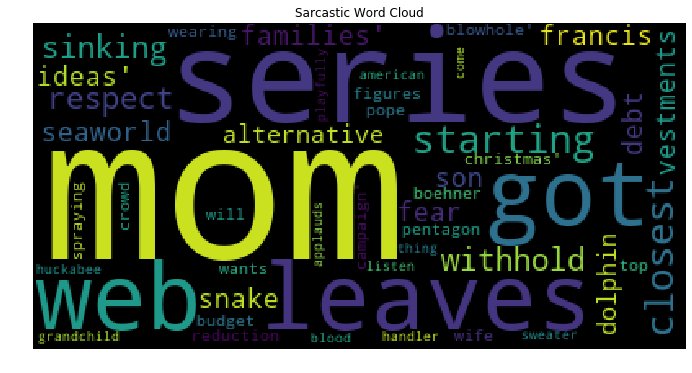

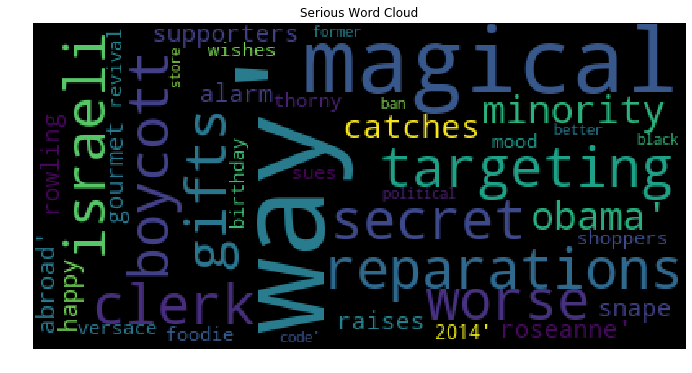

In [4]:
word_cloud_sar = WordCloud().generate(str(headlines_df[headlines_df['is_sarcastic'] == 1]['headline'].values))

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")
ax.set_title('Sarcastic Word Cloud')
ax.imshow(word_cloud_sar)


fig, ax = plt.subplots(figsize=(12, 6))
word_cloud_ser = WordCloud().generate(str(headlines_df[headlines_df['is_sarcastic'] == 0]['headline'].values))
ax.imshow(word_cloud_ser)
ax.axis("off")
ax.set_title('Serious Word Cloud')

Very interesting results! However, intuitively, it's hard to distinguish between sarcastic and serious solely using single words. Although some sarcastic words definitely stick out (blowhole, dolphin, thing, and wants), most seem to be representative of actual news headlines. This means the entire sentence will need to be considered when classifying the headlines.

### Model Training

For model selection, I am going straight to the heavy-hitters. I will be evaluating the performance of vanilla RNN and comparing it to GRU and LSTM. The gate-based GRU and LSTM show clear advantages when inputting long time series data by eliminating the vanishing and exploding gradients inherent to vanilla RNN. However, the data is only a sentence long in this case, so the computational overhead may outweight the benefits of GRU and LSTM. Let's find out!

In [ ]:
# Set up model(s)
# - LSTM
# - GRU

In [ ]:
# Train model(s)